<a href="https://colab.research.google.com/github/eyecandycoder/Abhishek/blob/main/SVR%20method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
X= dataset.iloc[: , 1: -1].values
y = dataset.iloc[: , -1].values

In [4]:
y = y.reshape(len(y),1)

In [5]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X= sc_x.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [9]:
from sklearn.svm import SVR
regressor = SVR( kernel = 'rbf')
regressor.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**Prediction of Salary with 6.5 years of Experience**



In [12]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

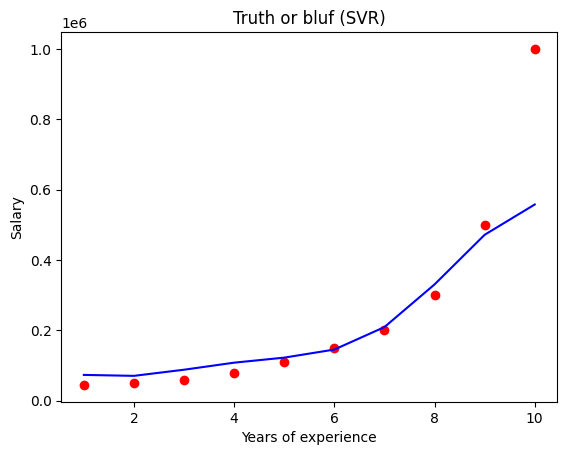

In [14]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or bluf (SVR)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

**Better Visualization**

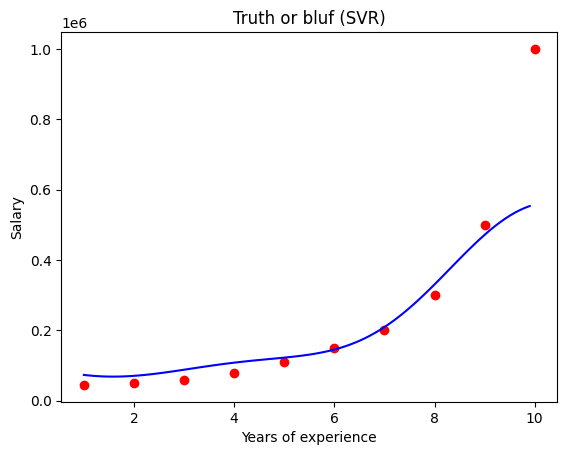

In [16]:
X_grid = np.arange(min(sc_x.inverse_transform(X)),max(sc_x.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or bluf (SVR)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()
